In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from itertools import combinations 
import scipy.stats as stats
import scipy
# from scipy.stats import ttest_indcou
from scipy.stats import fisher_exact
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from matplotlib.patches import Patch

# autoreload
# %load_ext autoreload
# %autoreload 2

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

In [65]:

def dataframe_from_csv(filepath):
    df = pd.read_csv(filepath)
    return df

In [66]:
cardio = dataframe_from_csv('../data/Cardiovascular_cleaned.csv')
cardio.shape

(308854, 19)

In [67]:
def test_for_heart_disease(dataframe, List_of_Columns, alpha):
    categories = ['Yes', 'No']
    # Loop through each column and perform the Mann-Whitney U test
    for col in List_of_Columns:
        for cat in categories:
            group1 = dataframe[dataframe['Heart_Disease'] == cat][col]
            group2 = dataframe[dataframe['Heart_Disease'] != cat][col]

            stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
        
            print(f"\nMann-Whitney U test for {col} and Heart_Disease={cat}:")
            print(f"Mann-Whitney U statistic: {stat}")
            print(f"P-value: {p_value}")

            if p_value < alpha:
                print("The difference is statistically significant.")
            else:
                print("There is no significant difference.")


In [68]:
columns = ['Alcohol_Consumption', 
           'Fruit_Consumption', 
           'Green_Vegetables_Consumption', 
           'FriedPotato_Consumption']
alpha = 0.05

test_for_heart_disease(cardio, columns, alpha)




Mann-Whitney U test for Alcohol_Consumption and Heart_Disease=Yes:
Mann-Whitney U statistic: 3006144385.5
P-value: 0.0
The difference is statistically significant.

Mann-Whitney U test for Alcohol_Consumption and Heart_Disease=No:
Mann-Whitney U statistic: 4082698007.5
P-value: 0.0
The difference is statistically significant.

Mann-Whitney U test for Fruit_Consumption and Heart_Disease=Yes:
Mann-Whitney U statistic: 3374577681.0
P-value: 2.3590727367213727e-37
The difference is statistically significant.

Mann-Whitney U test for Fruit_Consumption and Heart_Disease=No:
Mann-Whitney U statistic: 3714264712.0
P-value: 2.3590727367213727e-37
The difference is statistically significant.

Mann-Whitney U test for Green_Vegetables_Consumption and Heart_Disease=Yes:
Mann-Whitney U statistic: 3340434951.0
P-value: 3.777408343216292e-52
The difference is statistically significant.

Mann-Whitney U test for Green_Vegetables_Consumption and Heart_Disease=No:
Mann-Whitney U statistic: 3748407442.0
P

In [69]:
def clean_and_transform_dataframe(dataframe):
    # Convert 'Female' and 'Male' in the 'Sex' column to 0 and 1, respectively
    dataframe['Sex'] = dataframe['Sex'].replace({'Female': 0, 'Male': 1})

    # Create new binary columns for 'Male' and 'Female'
    dataframe['Male'] = (dataframe['Sex'] == 1).astype(int)
    dataframe['Female'] = (dataframe['Sex'] == 0).astype(int)
    # Drop the original 'Sex' column
    dataframe = dataframe.drop(columns=['Sex'])
    return dataframe

In [70]:
# Just for me to review changes were made
clean_and_transform_dataframe(cardio)
cardio = clean_and_transform_dataframe(cardio)
cardio.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Male,Female
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,0,1
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,0,1
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,0,1


In [71]:
def convert_to_binary(dataframe):
    # Map binary categorical variables to 0 and 1
    binary_cols = ['Heart_Disease', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']
    dataframe[binary_cols] = dataframe[binary_cols].replace({'No': 0, 'Yes': 1})
    dataframe = pd.get_dummies(dataframe, columns=['General_Health', 'Checkup', 'Diabetes'], drop_first=True)
    return dataframe

In [72]:
cardio = convert_to_binary(cardio)
cardio.head(3)

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,...,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy"
0,0,0,0,0,0,1,70-74,150.0,32.66,14.54,...,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,70-74,165.0,77.11,28.29,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,0,0,0,60-64,163.0,88.45,33.47,...,0,0,1,0,0,0,1,0,1,0


In [73]:
def average_age(dataframe):

    Average_Age = []
    for number in dataframe['Age_Category']:
        if '-' in number:
            new = number.split('-')
            Average_Age.append((int(new[0]) + int(new[1])) / 2)
        else: 
            Average_Age.append(85)

    dataframe['Average_Age'] = Average_Age
    dataframe = dataframe.drop(columns = 'Age_Category')
    return dataframe

In [74]:
cardio = average_age(cardio)
cardio.head(3)

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Height_(cm),Weight_(kg),BMI,Smoking_History,...,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Average_Age
0,0,0,0,0,0,1,150.0,32.66,14.54,1,...,1,0,0,1,0,0,0,0,0,72.0
1,0,1,0,0,0,0,165.0,77.11,28.29,0,...,0,1,0,0,0,1,0,1,0,72.0
2,1,0,0,0,0,0,163.0,88.45,33.47,0,...,0,1,0,0,0,1,0,1,0,62.0


In [79]:
def logistic_regression(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Apply standard scaling to the features to have no variance ##
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create the logistic regression model
    logit_model = LogisticRegression()

    # Train the logistic regression model on the training data
    logit_model.fit(X_train, y_train)

    # Perform k-fold cross-validation with 10 folds
    cv_scores = cross_val_score(logit_model, X_train_scaled, y_train, cv=10, scoring='roc_auc')

    # Calculate the average ROC-AUC score
    average_roc_auc = np.mean(cv_scores)

    # Predict on the test set and calculate ROC-AUC score for testing data. Model evaluated on test data
    # threshold = 0.32
    y_pred = logit_model.predict_proba(X_test_scaled)[:, 1] # > threshold
    roc_auc_test = roc_auc_score(y_test, y_pred)

    # Print the results
    print("ROC-AUC scores for each fold:")
    print(cv_scores)
    print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
    print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))

    # Print the classification report on testing data
    y_pred_binary = (y_pred >= 0.5).astype(int)
    print("\nClassification Report on Testing Data:")
    print(classification_report(y_test, y_pred_binary))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_binary)

    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {average_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


In [80]:
# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

ROC-AUC scores for each fold:
[0.83581587 0.83996067 0.84231026 0.83711867 0.83089049 0.83413677
 0.83713559 0.83602247 0.8278158  0.82695703]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.77

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.97      0.59      0.73     56774
           1       0.14      0.79      0.24      4997

    accuracy                           0.61     61771
   macro avg       0.56      0.69      0.49     61771
weighted avg       0.90      0.61      0.69     61771



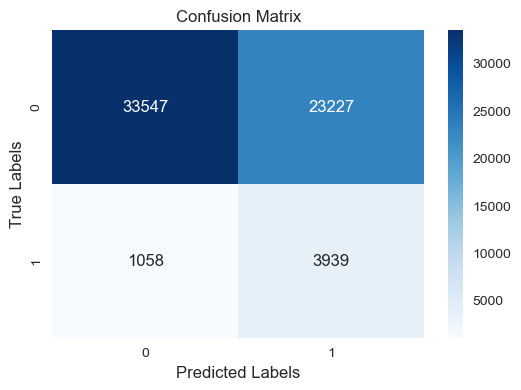

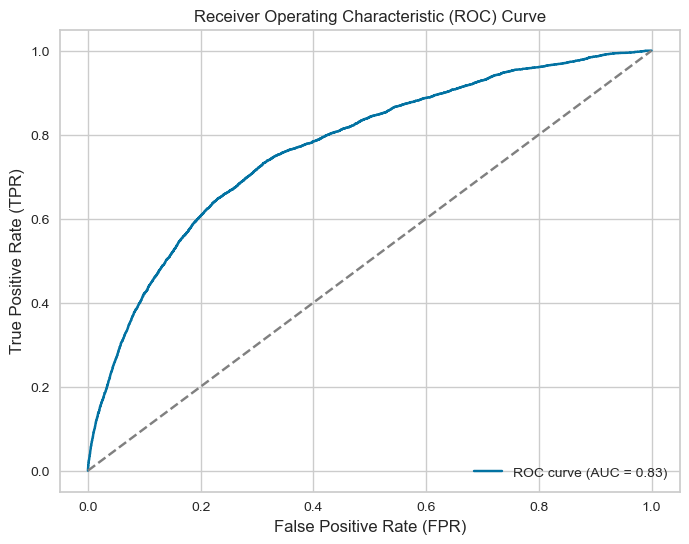

In [81]:
logistic_regression(X, y)

In [82]:
def feature_importance(X, y):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Create the logistic regression model
    logit_model = LogisticRegression()

    # Train the logistic regression model on the training data
    logit_model.fit(X_train, y_train)

    # Get feature names from cardio dataset
    feature_names = X.columns

    # Get feature importances from the fitted logistic regression model
    feature_importances = logit_model.coef_[0]

    # Sort features by their importance
    sorted_indices = np.argsort(feature_importances)[::-1]
    sorted_importances = feature_importances[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    # Remove underscores from feature names
    sorted_feature_names = [name.replace('_', ' ') for name in sorted_feature_names]

    # Create a list of colors for the bars
    colors = ['blue' if imp > 0 else 'red' for imp in sorted_importances]

    # Create a horizontal bar chart of feature importances with different colors
    plt.figure(figsize=(10, 8))
    bars = plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center', color=colors)
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot (Horizontal Bar with Colors)')
    plt.tight_layout()

    # Create custom legend handles with distinct colors
    legend_handles = [Patch(facecolor='blue', edgecolor='black', label='Positive Influence'),
                    Patch(facecolor='red', edgecolor='black', label='Negative Influence')]

    # Add the custom legend handles
    plt.legend(handles=legend_handles)

    plt.show()

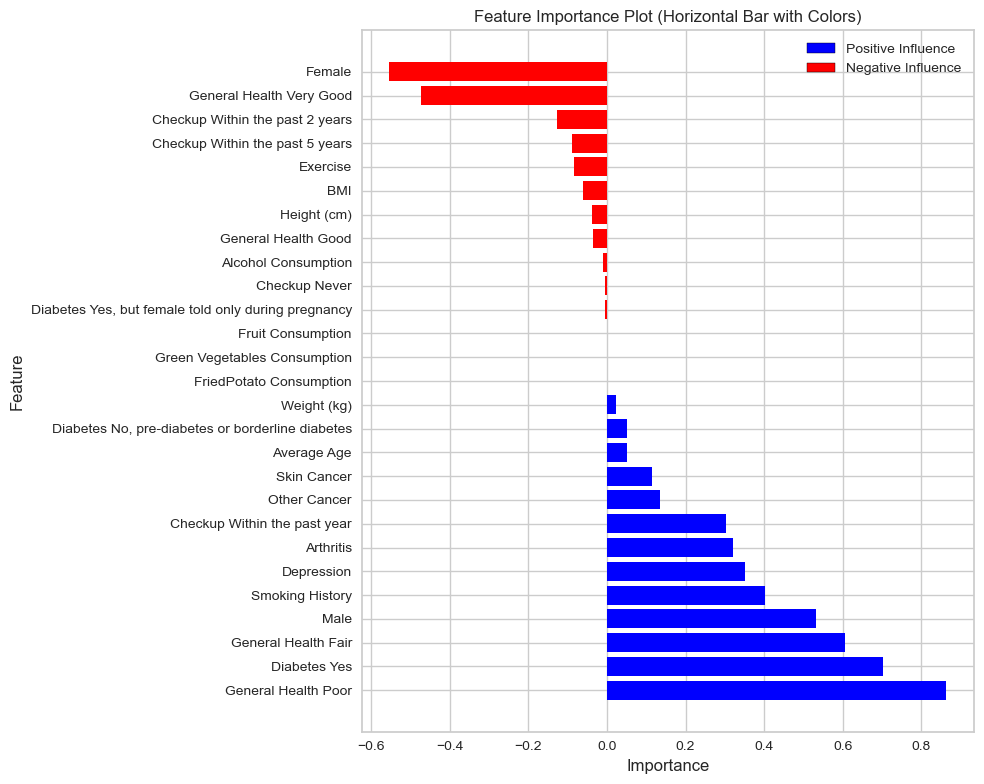

In [83]:
feature_importance(X, y)

In [ ]:
def cardio(filepath, List_of_Columns, alpha):
    dataframe = dataframe_from_csv(filepath)
    test_for_heart_disease(dataframe, List_of_Columns, alpha)
    dataframe = clean_and_transform_dataframe(dataframe)
    dataframe = convert_to_binary(dataframe)
    dataframe = average_age(dataframe)
    X, y = X_y(dataframe)
    logistic_regression(X, y)
    feature_importance(X, y)
    


In [94]:
import sys
sys.path.insert(0, "../src")

In [95]:
from cardio_v2 import cardio_pipeline

ImportError: cannot import name 'cardio_pipeline' from 'cardio_v2' (c:\users\monke\daimil10\capstone\Cardiovascular_diseases_risk_prediction\notebooks\cardio_v2.py)

In [91]:
cardio_v2.cardio_pipeline('../data/Cardiovascular_cleaned.csv', columns, alpha)

AttributeError: module 'cardio_v2' has no attribute 'cardio_pipeline'